In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

In [2]:
#loading the csv into dataframe
car = pd.read_csv('/Users/gina/Desktop/ALY6020/car.csv') 
car

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,0
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [3]:
# Checking for missing values

car.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
US Made         0
dtype: int64

In [4]:
# Checking data types column by column

car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   US Made       398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [5]:
# Statistical description of the numerical columns in the dataset

car.describe()

,MPG,Cylinders,Displacement,Weight,Acceleration,Model Year,US Made
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.625628
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.484569
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000


In [6]:
# Checking the shape of the dataset
car.shape

(398, 8)

In [7]:
# Checking for bad values in the dataset

for col in car:
    print(col,": ", car[col].dtypes)
    print(car[col].unique())
    

MPG :  float64
[18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]
Cylinders :  int64
[8 4 6 3 5]
Displacement :  float64
[307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.
  91.   97.5  70.  120.   96.  108.  155.   68.  114.  156.

In [8]:
# % of data points containing '?' 

cols = ["Horsepower"]

np.sum((car[cols]=="?").any(axis="columns"))/len(car)*100


1.507537688442211

In [9]:
# Since the bad value is Horesepower is a very small amount, we will drop it

#car = car[~car.isin(['?']).any(axis=1)]
#car
car = car.loc[(car[cols] != '?').all(axis ="columns")]

In [10]:
# Shape after dropping the bad values

car.shape


(392, 8)

In [11]:
car['Horsepower'] = pd.to_numeric(car['Horsepower'], errors='coerce').fillna(0)

<ipython-input-11-a9b19bed2d26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['Horsepower'] = pd.to_numeric(car['Horsepower'], errors='coerce').fillna(0)


In [12]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    int64  
 4   Weight        392 non-null    int64  
 5   Acceleration  392 non-null    float64
 6   Model Year    392 non-null    int64  
 7   US Made       392 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 27.6 KB


In [13]:
car.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,0.625000
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.484742
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,0.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000


# EDA

<AxesSubplot:>

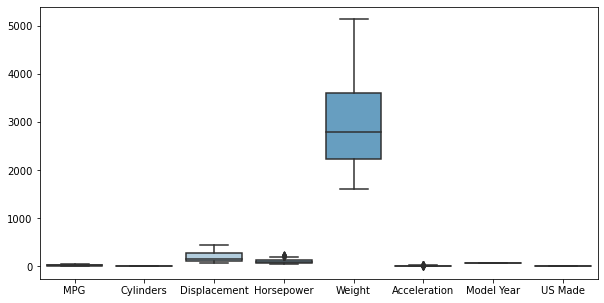

In [14]:
#Boxplot to show all the numerical variables to check for outliers

plt.figure(figsize=(10,5))
sns.boxplot(data= car, palette = "Blues")

<AxesSubplot:xlabel='MPG', ylabel='Count'>

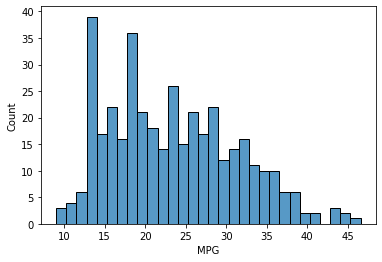

In [15]:
# Checking the MPG of the cars in the past

sns.histplot(x="MPG",bins= 30,data=car)

In [16]:
# MPG by Model year and US Made

model_year = car.groupby(['Model Year', 'MPG','US Made']).size()
model_year

Model Year  MPG   US Made
70          9.0   1          1
            10.0  1          2
            11.0  1          1
            14.0  1          5
            15.0  1          5
                            ..
82          36.0  1          2
            37.0  0          1
            38.0  0          2
                  1          2
            44.0  0          1
Length: 280, dtype: int64

In [17]:
#Percentage of data points with USA as their car make country

np.sum(car['US Made']== 1)/len(car['US Made'])*100

62.5

In [18]:
#Percentage of data points with othe countries as their car make country
np.sum(car['US Made']== 0)/len(car['US Made'])*100

37.5

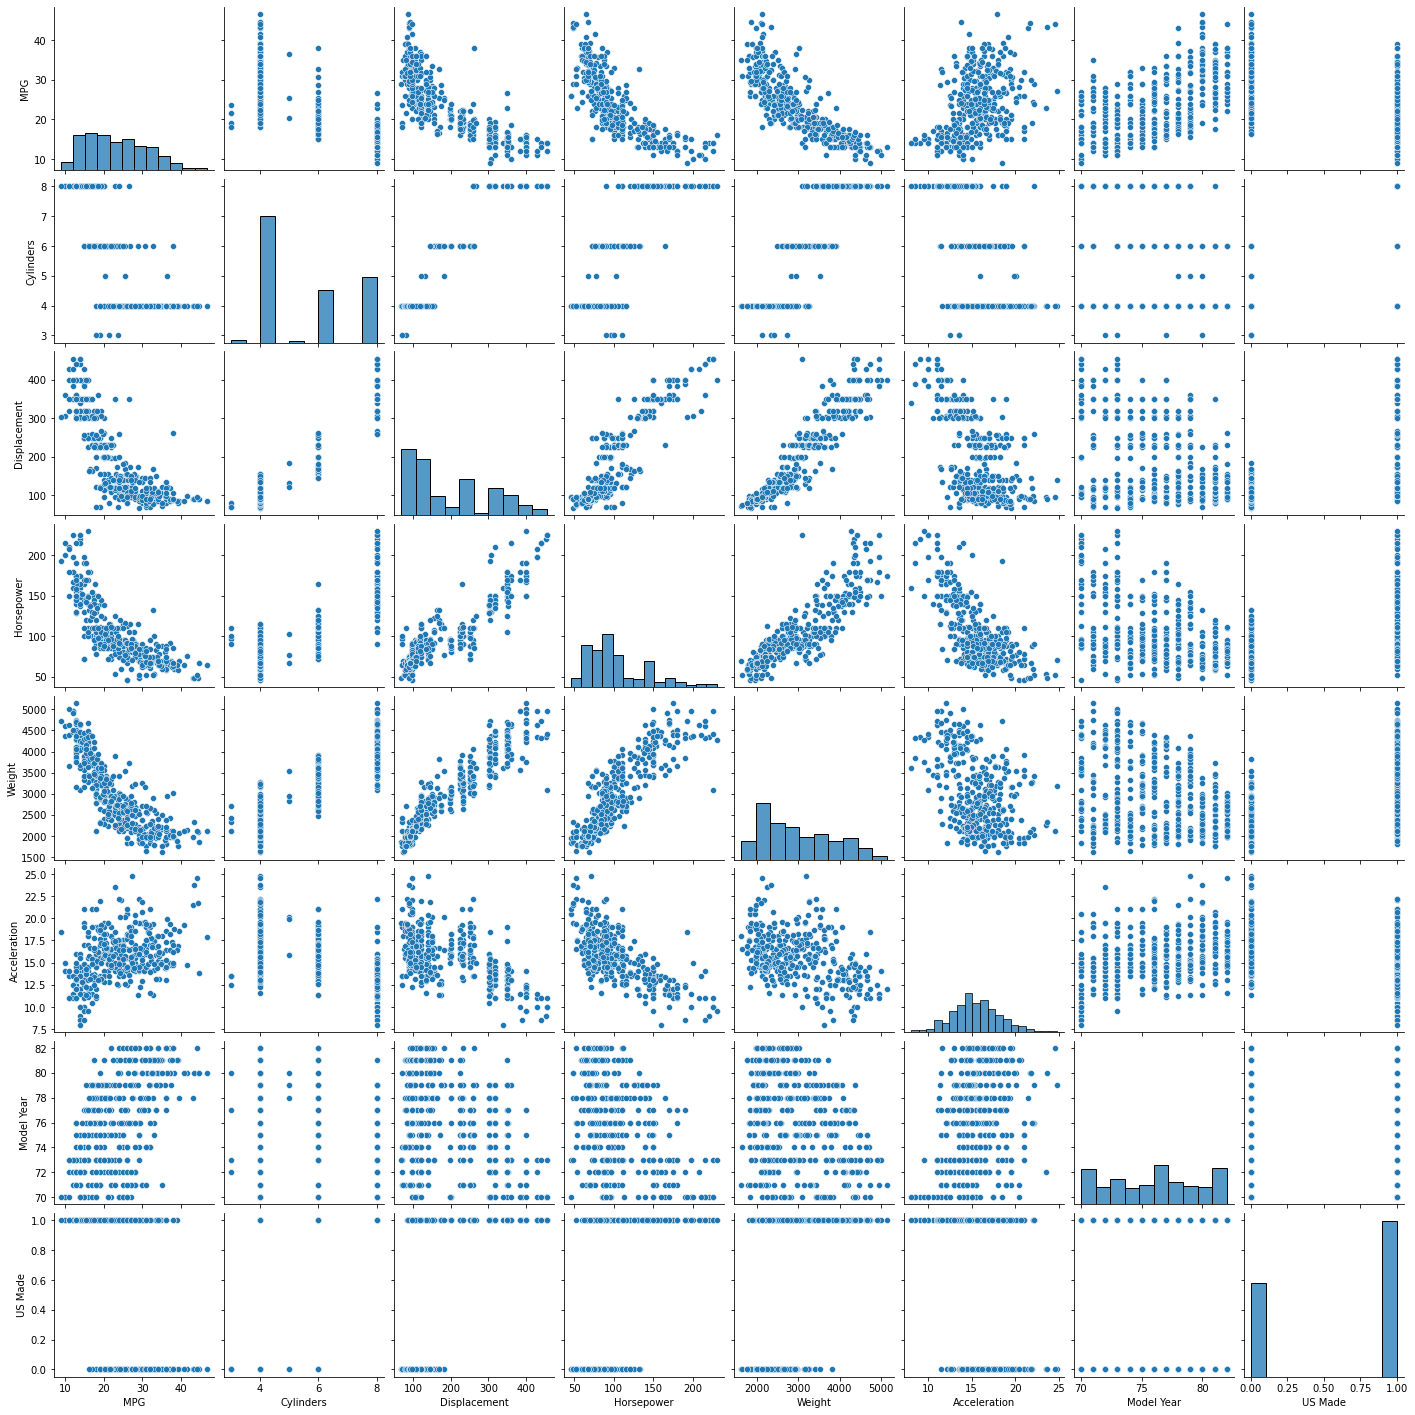

In [19]:
# Plotting all the numerical variables together to check the distribution

sns.pairplot(car)

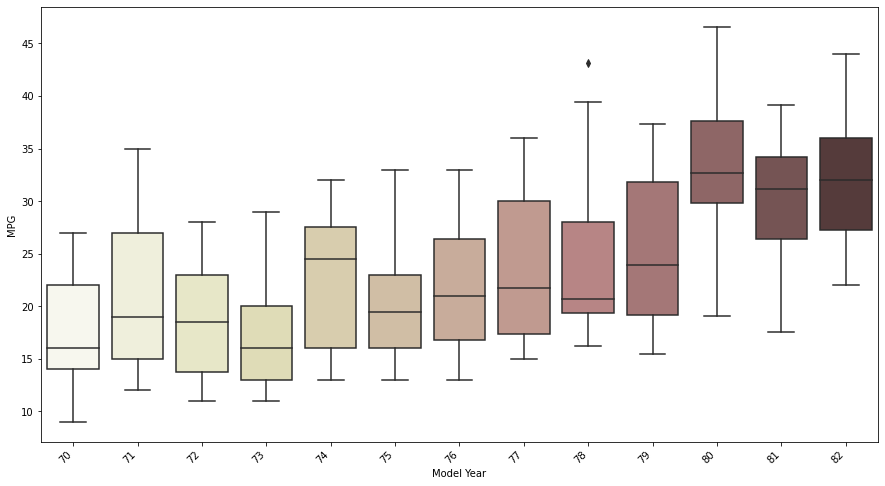

In [20]:
# Checking the relation between MPG and Model year if Model year could be affecting the MPG for the cars
plt.figure(figsize=(15,8))
ax = sns.boxplot(x = 'Model Year', y = 'MPG', data = car, palette=("pink_r"))
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

<AxesSubplot:>

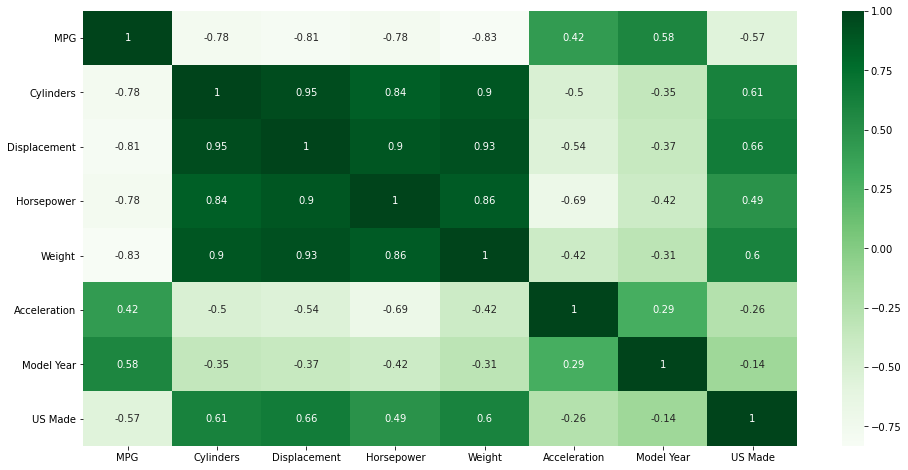

In [21]:
plt.figure(figsize = (16, 8))
corr  = car.corr()
sns.heatmap(corr, cmap="Greens", annot=True)

In [22]:
def calc_VIF(x):
    vif= pd.DataFrame()
    vif['variables']=x.columns
    vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

    return(vif)

In [23]:
x=car.iloc[:,:-1]
calc_VIF(x)

,variables,VIF
0,MPG,51.428135
1,Cylinders,116.733470
2,Displacement,86.914723
3,Horsepower,60.711387
4,Weight,170.491742
5,Acceleration,69.457673
6,Model Year,290.860150


In [24]:
# Removing the variables that are causing high multicollinearity

car1 = car.drop(['Weight','Cylinders','Displacement'],axis=1)
x=car1.iloc[:,:-1]
calc_VIF(x)

,variables,VIF
0,MPG,34.684836
1,Horsepower,29.509345
2,Acceleration,58.336679
3,Model Year,229.367560


# Analysis (Linear Regression)

In [25]:
# Splitting train and test dataset into 80:20 percent ratio.
X_train, X_test = train_test_split(car, train_size=0.7, random_state=100) 
print(X_train.shape)
print(X_test.shape)

(274, 8)
(118, 8)


In [26]:
# Instantiate an object 
scaler = MinMaxScaler()

In [27]:
# Scaling the data training data for better results
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
car_train = scaler.transform(X_train)
car_test = scaler.transform(X_test)

In [28]:
#Split independent from dependent variables (x,y) 
y = car[['MPG']]
X = car.iloc[:, list(range(1,8))]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [29]:
import statsmodels.api as sm 
x2=sm.add_constant(X_train) 
est=sm.OLS(y_train,x2) 
est2=est.fit() 
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     210.6
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          8.98e-113
Time:                        22:26:26   Log-Likelihood:                -816.80
No. Observations:                 313   AIC:                             1650.
Df Residuals:                     305   BIC:                             1680.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -16.6855      5.319     -3.137   

In [30]:
# take the result of an statsmodel results table and transforms it into a dataframe
def results_summary_to_dataframe(results):
    
    pvals = results.pvalues
    coeff = results.params
    conf_lower = results.conf_int()[0]
    conf_higher = results.conf_int()[1]

    results_df = pd.DataFrame({"p_vals":pvals,
                               "coeff":coeff,
                               "conf_lower":conf_lower,
                               "conf_higher":conf_higher
                                })
#Reordering...
    results_df = results_df[["coeff","p_vals","conf_lower","conf_higher"]]
    return results_df

In [31]:
df_results = results_summary_to_dataframe(est2)
df_results

,coeff,p_vals,conf_lower,conf_higher
const,-16.685512,1.874200e-03,-27.152352,-6.218671
Cylinders,-0.331130,3.706076e-01,-1.057814,0.395554
Displacement,0.019404,2.516678e-02,0.002433,0.036375
Horsepower,-0.020837,1.783735e-01,-0.051235,0.009560
Weight,-0.006498,8.502655e-18,-0.007896,-0.005100
Acceleration,0.044114,6.875601e-01,-0.171526,0.259753
Model Year,0.802775,4.796203e-33,0.686144,0.919406
US Made,-3.058007,4.067847e-08,-4.126640,-1.989374


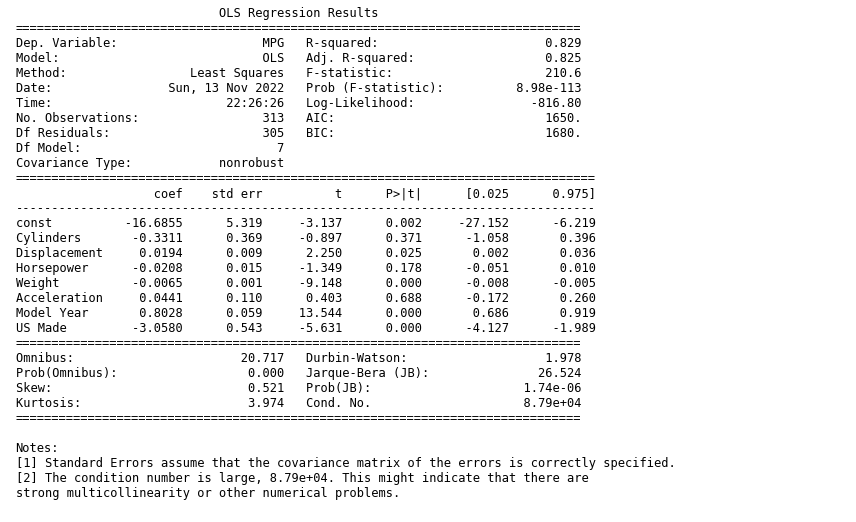

In [32]:
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(est2.summary()), {'fontsize': 12}, fontproperties = 'monospace'), plt.axis('off')
plt.tight_layout()
plt.savefig('output.png')